In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [28]:
salary_df = pd.read_excel('./salary_data_states.xlsx')
salary_df.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [29]:
column_names = salary_df.columns.tolist()
print(column_names)



['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_STATE_ABBREVIATION', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'order']


In [30]:
state_to_region = {
    
'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 
'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
'New York': 'Northeast', 'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast',
'Delaware': 'Northeast',

 
'Maryland': 'South', 'Virginia': 'South', 'West Virginia': 'South',
'North Carolina': 'South', 'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
'Kentucky': 'South', 'Tennessee': 'South', 'Alabama': 'South', 'Mississippi': 'South',
'Arkansas': 'South', 'Louisiana': 'South', 'Texas': 'South', 'Oklahoma': 'South',

  
'Ohio': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Illinois': 'Midwest',
'Wisconsin': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',


'Montana': 'West', 'Wyoming': 'West', 'Colorado': 'West', 'New Mexico': 'West',
'Arizona': 'West', 'Utah': 'West', 'Nevada': 'West', 'Idaho': 'West',
'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Alaska': 'West', 'Hawaii': 'West',


'Puerto Rico': 'Territory', 'Guam': 'Territory', 'American Samoa': 'Territory', 
'U.S. Virgin Islands': 'Territory', 'Northern Mariana Islands': 'Territory'
}


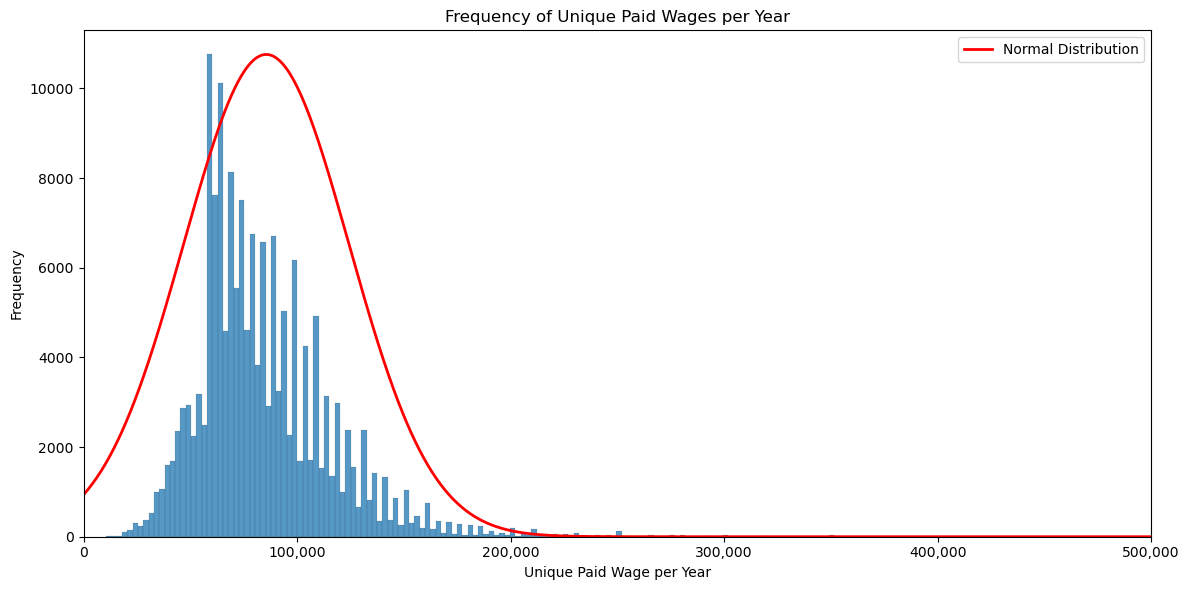

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats

plt.figure(figsize=(12, 6))
sns.histplot(data=salary_df, x='PAID_WAGE_PER_YEAR', bins=1000, kde=False)

plt.title('Frequency of Unique Paid Wages per Year')
plt.xlabel('Unique Paid Wage per Year')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xlim(0, 500000)

mean = salary_df['PAID_WAGE_PER_YEAR'].mean()
std_dev = salary_df['PAID_WAGE_PER_YEAR'].std()
x = np.linspace(0, 500000, 1000)
y = stats.norm.pdf(x, mean, std_dev)
y = y * (np.max(np.histogram(salary_df['PAID_WAGE_PER_YEAR'], bins=1000)[0]) / np.max(y))

plt.plot(x, y, color='red', label='Normal Distribution', linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()


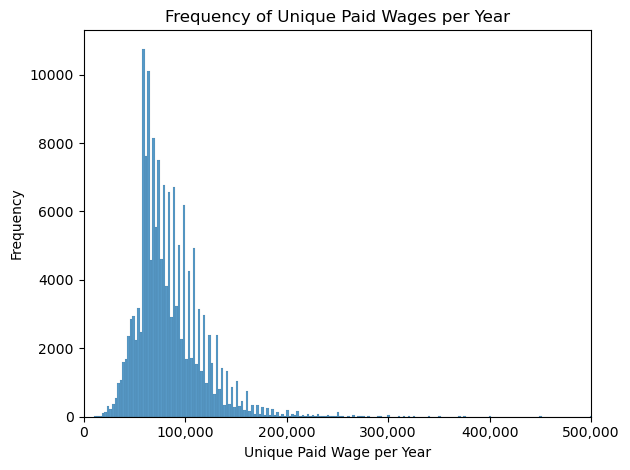

In [95]:
sns.histplot(data=salary_df, x='PAID_WAGE_PER_YEAR', bins=1000)

plt.title('Frequency of Unique Paid Wages per Year')
plt.xlabel('Unique Paid Wage per Year')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xlim(0, 500000)

plt.tight_layout()
plt.show()

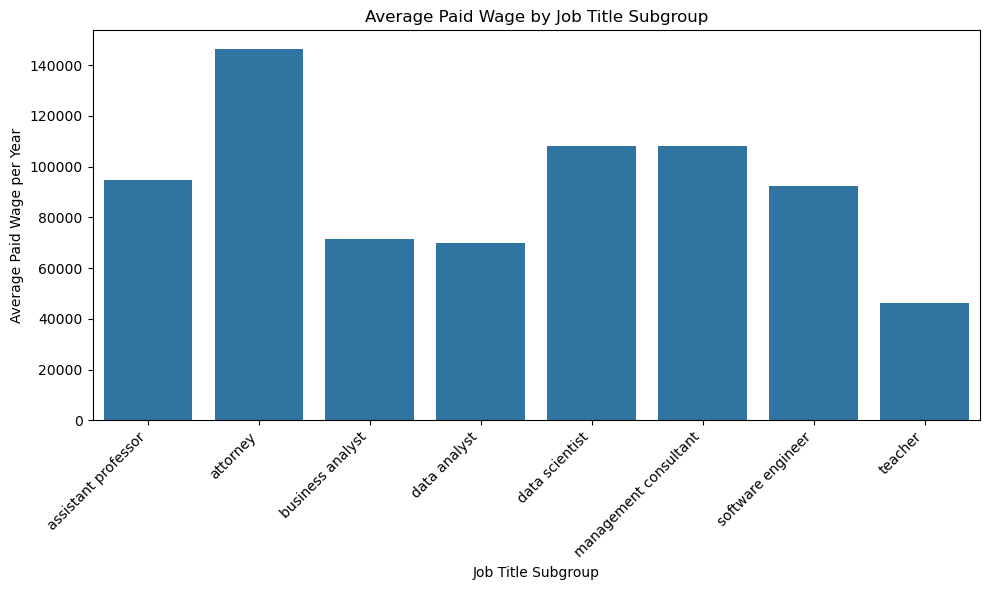

In [68]:
average_wage_by_subgroup_df = salary_df.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='JOB_TITLE_SUBGROUP', y='PAID_WAGE_PER_YEAR', data=average_wage_by_subgroup_df)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Title Subgroup')
plt.ylabel('Average Paid Wage per Year')
plt.title('Average Paid Wage by Job Title Subgroup')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()

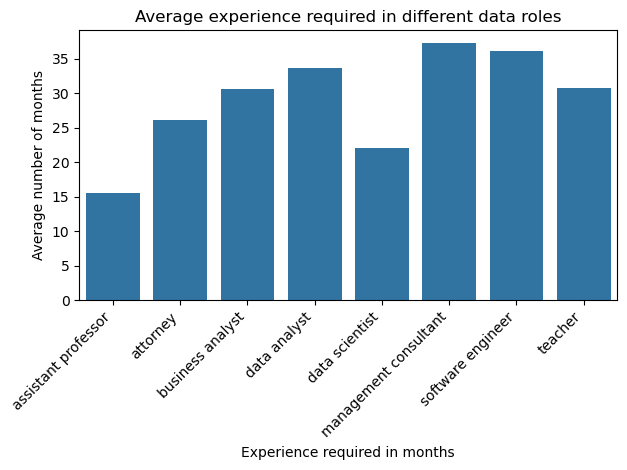

In [33]:
average_experience_by_subgroup = salary_df.groupby('JOB_TITLE_SUBGROUP')['EXPERIENCE_REQUIRED_NUM_MONTHS'].mean()
average_experience_by_subgroup_df = average_experience_by_subgroup.reset_index()
sns.barplot(x='JOB_TITLE_SUBGROUP', y='EXPERIENCE_REQUIRED_NUM_MONTHS', data=average_experience_by_subgroup_df)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Experience required in months')
plt.ylabel('Average number of months')
plt.title('Average experience required in different data roles')

plt.tight_layout()
plt.show()

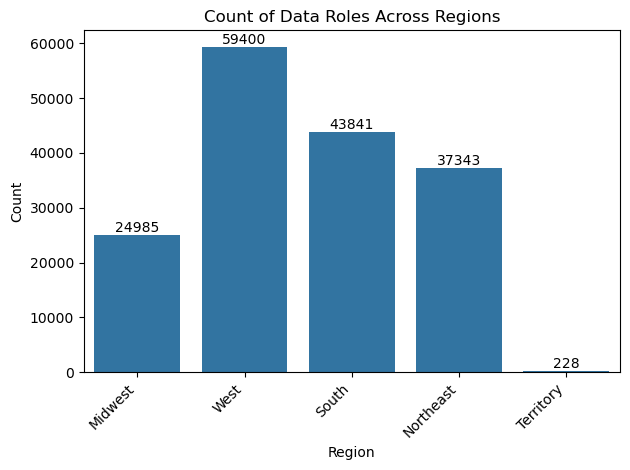

In [34]:

salary_df['REGION'] = salary_df['WORK_STATE'].map(state_to_region)

ax = sns.countplot(x='REGION', data=salary_df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black')  # Adjust font size and color

plt.ylabel('Count')  
plt.xlabel('Region') 
plt.title('Count of Data Roles Across Regions')  
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()


In [35]:
salary_df['JOB_TITLE_SUBGROUP'].nunique()

8

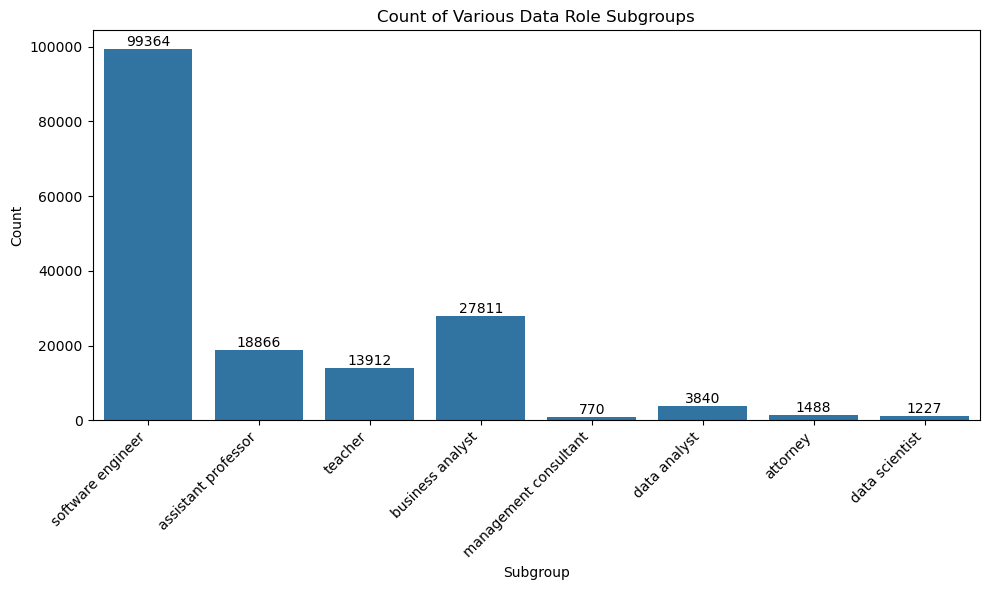

In [36]:
plt.figure(figsize=(10, 6))  
ax2 = sns.countplot(x='JOB_TITLE_SUBGROUP', data=salary_df)

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',  
                  (p.get_x() + p.get_width() / 2, p.get_height()),  
                  ha='center', va='bottom', fontsize=10, color='black')

plt.ylabel('Count')  
plt.xlabel('Subgroup')  
plt.title('Count of Various Data Role Subgroups')  
plt.xticks(rotation=45, ha='right')

plt.tight_layout()


plt.show()


In [104]:
def aggregate_info(subgroup):
    most_frequent_major = subgroup['COLLEGE_MAJOR_REQUIRED'].mode()[0] if not subgroup['COLLEGE_MAJOR_REQUIRED'].isnull().all() else None
    most_frequent_education = subgroup['EDUCATION_LEVEL_REQUIRED'].mode()[0] if not subgroup['EDUCATION_LEVEL_REQUIRED'].isnull().all() else None
    
    return pd.Series({
        'Most Frequent College Major': most_frequent_major,
        'Most Frequent Education Level': most_frequent_education
    })
grouped_results = salary_df.groupby('JOB_TITLE_SUBGROUP').apply(aggregate_info).reset_index()

print(grouped_results)


      JOB_TITLE_SUBGROUP            Most Frequent College Major  \
0    assistant professor                               medicine   
1               attorney                                    law   
2       business analyst  comp sci, sci, eng (any), math or bus   
3           data analyst                              economics   
4         data scientist                       computer science   
5  management consultant                business administration   
6      software engineer                       computer science   
7                teacher                              any field   

  Most Frequent Education Level  
0                     Doctorate  
1                         Other  
2                      Master's  
3                      Master's  
4                      Master's  
5                      Master's  
6                      Master's  
7                    Bachelor's  


/var/folders/hq/m07jk53x3758smk7n1g_k1800000gn/T/ipykernel_31129/2748411622.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_results = salary_df.groupby('JOB_TITLE_SUBGROUP').apply(aggregate_info).reset_index()


In [38]:
filtered_salary_df = salary_df[salary_df['EDUCATION_LEVEL_REQUIRED'] != 'Other']
average_wage_by_education = filtered_salary_df.groupby('EDUCATION_LEVEL_REQUIRED').agg({'PAID_WAGE_PER_YEAR': 'mean'}).reset_index()
average_wage_by_education.columns = ['Education Level', 'Average Paid Wage Per Year']

print(average_wage_by_education)




  Education Level  Average Paid Wage Per Year
0     Associate's                90354.047619
1      Bachelor's                97832.336480
2       Doctorate                85223.964835
3     High School                62093.000000
4        Master's                99185.500013


In [39]:
# I. Do specific sub-types of data-related jobs have higher or lower salaries than others ?

# 1a - Which companies have the highest salries for those subtypes ?

# 1b - Changes with location of the job ?

# 1c - Will the answer change if I take the standard of living into account ?

In [40]:
# II. What states (of those I am willing to move to) have the highest paying data-related salaries ?
 
# 2a - Differences between job subcategories ?

# 2b - Which companies have the highest salaries of those sub-types ?

# 2c - Will the answer change if I take the standard of living into account ?

In [41]:
# III. How do offered salaries compare to the prevailing wage ?

# 3a - Are there job sub-categories that tend to get over- or under- paid ?

# 3b - Are there companies that tend to over- or under- pay ?

# 3c - Will the answer change if I take the standard of living into account ?

In [7]:
pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 1.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=b5b7c50022a168a7e49474f49410de6d6e7e56e8bfceedabbe54e0f7fed72b24
  Stored in directory: /Users/reesewn/Library/Caches/pip/wheels/46/d2/26/84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "./kaggle.json"


In [7]:
!kaggle datasets download -d "lukkardata/cost-of-living-missouri-economic-research"

Dataset URL: https://www.kaggle.com/datasets/lukkardata/cost-of-living-missouri-economic-research
License(s): U.S. Government Works
  0%|                                               | 0.00/1.39k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.39k/1.39k [00:00<00:00, 2.00MB/s]


In [15]:
import zipfile

zip_file_path = './cost-of-living-missouri-economic-research.zip'
extract_folder = '.'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extract_folder')

['salary_data_states.xlsx',
 'Reese.ipynb',
 'Vinh.ipynb',
 'kaggle.json',
 'cost-of-living-missouri-economic-research.zip',
 'swikar.ipynb',
 'Salary-Data-Set-Description.pdf',
 '.ipynb_checkpoints',
 'DS311_Group_Project_Option_2.pdf',
 'Kelly.ipynb',
 'DataSummary.pdf']